# OpenSoundscape Audio Read and spectrogram generate
- Exploratory notebook to develop a method to read .flac .wav and .mp3 audio files from disk and make spectrograms with default settings from these files. 
- Audio files will also be linked to a pandas dataframe. 
- Audio files will be cropped or looped to 3 seconds or other chosen duration

<br><br>

To Do:
- Load all of the clips and look at their lengths. 
- Create a batch of spectrograms saved to disk
- re-scale the spectrograms so that the frequency scale is centered on and bounded by the typical vocalization freq of the olive sided flycatcher. This doesn't need implementing until after first model is run. 

In [1]:
from pathlib import Path
from opensoundscape import Audio, Spectrogram
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/notebooks/exploratory


Set relative paths. 

In [3]:
data_path = Path('../../data/')
audio_read_path = Path('../../data/raw/recordings/')
image_save_path = Path('../../data/processed/img')
audio_save_path = Path('../../data/processed/audio')

# Load processed dataframe. 

In [4]:
df = pd.read_pickle(data_path/'processed/processed_metadata.pkl')

In [5]:
df.head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,right_freq_filter_tag_min_level,right_freq_filter_tag_max_level,right_freq_filter_tag_peak_level_dbfs,tagged_in_wildtrax,url,tag_spectrogram_url,clip_url,sensorId,tasks,status
0,BU,Alberta Archetypes,1501,BBS-4139-20,87850,2021-07-03 06:56:02,331758,None,595843,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
1,BU,Alberta Archetypes,1501,BBS-4139-27,87844,2021-07-03 07:42:01,331765,None,595844,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
2,BU,Alberta Archetypes,1501,BBS-4139-28,87842,2021-07-03 07:47:01,331764,None,595845,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
3,BU,Alberta Archetypes,1501,BBS-4139-28,87842,2021-07-03 07:47:01,331764,None,595845,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active
4,BU,Alberta Archetypes,1501,BBS-4139-36,87834,2022-06-26 08:24:04,358620,None,595846,Transcribed,...,NaN,NaN,NaN,f,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active


In [8]:
audio_files = glob(str(audio_read_path)+'/*')
audio_files[:10], len(audio_files)

(['../../data/raw/recordings/recording-255457-clip-7987.mp3',
  '../../data/raw/recordings/recording-255457-clip-7978.mp3',
  '../../data/raw/recordings/recording-255454-clip-7941.mp3',
  '../../data/raw/recordings/recording-255454-clip-7955.mp3',
  '../../data/raw/recordings/recording-255518-clip-8158.mp3',
  '../../data/raw/recordings/recording-255544-clip-8024.mp3',
  '../../data/raw/recordings/recording-255544-clip-8030.mp3',
  '../../data/raw/recordings/recording-255544-clip-8031.mp3',
  '../../data/raw/recordings/recording-255544-clip-8025.mp3',
  '../../data/raw/recordings/recording-255518-clip-8159.mp3'],
 258)

## A quick exploration of the opensoundscape audio / spec tutorial on flac and mp3
flac first

In [9]:
image_shape = (224,224)

In [42]:
audio = Audio.from_file(audio_files[2])

In [43]:
audio

<Audio(samples=(92160,), sample_rate=44100)>

In [44]:
spec = Spectrogram.from_audio(audio)

In [135]:
image = spec.to_image(shape=image_shape, invert=True)

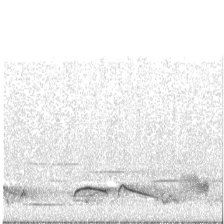

In [137]:
image

Great we can see a spectrogram with default settings. 

Turn this into a function then try on an mp3. 

In [140]:
audio_files[2]

'../../data/raw/recordings/recording-255454-clip-7941.mp3'

In [141]:
def show_spec_from_audio(file_path):
    audio = Audio.from_file(file_path)
    spec = Spectrogram.from_audio(audio)
    image = spec.to_image(shape=image_shape, invert=True)
    return image

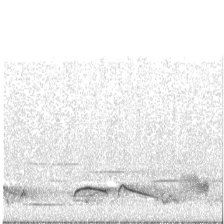

In [144]:
show_spec_from_audio(audio_files[2])

Great, it works on mp3s too. 

# Generate multiuple spectrograms
The spectrograms need to all end up being the same dimensions. 

In [147]:
audio_files = glob('../../data/raw/recordings/*')
audio_files[0]

'../../data/raw/recordings/recording-552428-clip-648452.flac'

In [148]:
first_10 = audio_files[:10]

# Trim the audio to 3s length or loop the sample
using crop off the end or concatenation of the start onto the end until the length is achieved

In [154]:
clip_length = 3.0

def resize_clip(audio_file, clip_length):


    audio = Audio.from_file(audio_file)
    if audio.duration < clip_length:
        audio = audio.loop(clip_length)
        print('sample extended by looping')
    elif audio.duration > clip_length:
        audio = audio.extend_to(clip_length)
        print('audio file trimmed')
    elif audio.duration == clip_length:
        pass
        
    return audio
    
clip = resize_clip(audio_files[5], clip_length)
clip

sample extended by looping


<Audio(samples=(132300,), sample_rate=44100)>

In [ ]:
def make_spectrograms()

In [ ]:
image_shape = (224,224)

plt.figure()
plt.subplot(2,1,1)
idx = 0
audio = equal_length_clips[idx]
spec = Spectrogram.from_audio(audio)
spec.plot(fname=image_save_path/'test.png')

plt.subplot(2,1,2)
idx += 1

audio = equal_length_clips[idx]
spec = Spectrogram.from_audio(audio)
spec.plot(fname=image_save_path/'test.png')